In [1]:
import pandas as pd
import numpy as np

import time
import string
import random
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 12

In [2]:
# import nltk
# nltk.download('wordnet')
# nltk.download('words')

In [3]:
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import words

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [56]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

In [5]:
# declarate 
dict_word = set(words.words())

p_stem = PorterStemmer()
lem = WordNetLemmatizer()

In [6]:
!ls

path_to_dataset.txt          website_classification.ipynb
website_classification.csv


In [7]:
df = pd.read_csv('website_classification.csv')
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [8]:
df.tail()

,Unnamed: 0,website_url,cleaned_website_text,Category
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult
1407,1407,http://www.world-sex-news.com/,world sex news daily sex news adult news eroti...,Adult


In [9]:
df = df.drop('Unnamed: 0', axis=1)
df.index.name = 'row_id'
df.head()

,website_url,cleaned_website_text,Category
row_id,,,
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['website_url', 'cleaned_website_text', 'category'], dtype='object')

In [11]:
# check missing values
df.isna().sum()

website_url             0
cleaned_website_text    0
category                0
dtype: int64

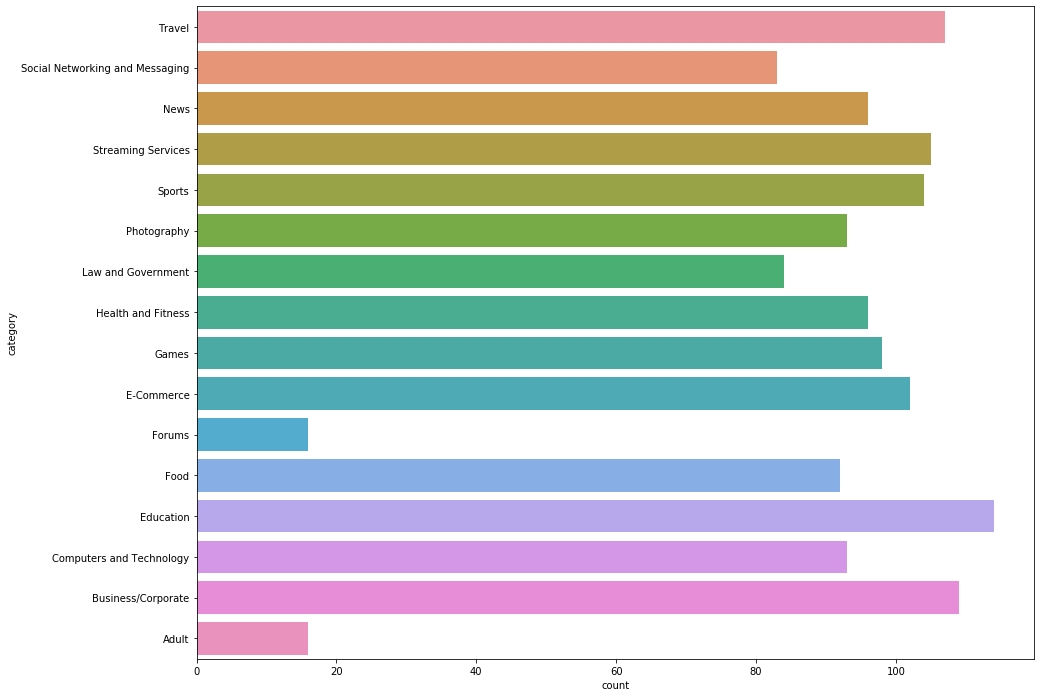

In [12]:
sns.countplot(y='category', data=df);

In [13]:
all_categories = df['category'].unique()

print('unique_categories =', len(all_categories))

all_categories

unique_categories = 16


array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

In [14]:
# let see any expamle:

rn = random.randint(0, len(df))

print('category =', df['category'][rn], '\n')
print('text =', df['cleaned_website_text'][rn])

category = Sports 

text = follow late india sports news reports features sports news sport article sport news latest cricket latest football late sport blog football live blog kabaddi live blog news commentary live blog schedule fixture match report cricket football tennis hockey kabaddi sport news sport article live blog late news cricket football kabaddi badminton hockey tennis basketball late cricket news late football news ipl football cricket sc originals sc reviews sports en login account user login account user options follow late india sports news reports features news reports feature odds teams csk dc kxip kkr mi rr rcb srh players ms dhoni shreyas iyer kl rahul dinesh karthik rohit sharma steve smith virat kohli kane williamson news national international features teams india fc goa atk fc pune city mumbai city fc kerala blasters fc chennaiyin fc bengaluru fc tournament isl league players ferran corominas miku fedor udanta singh gurpreet singh sandhu sandesh jhingan sergio l

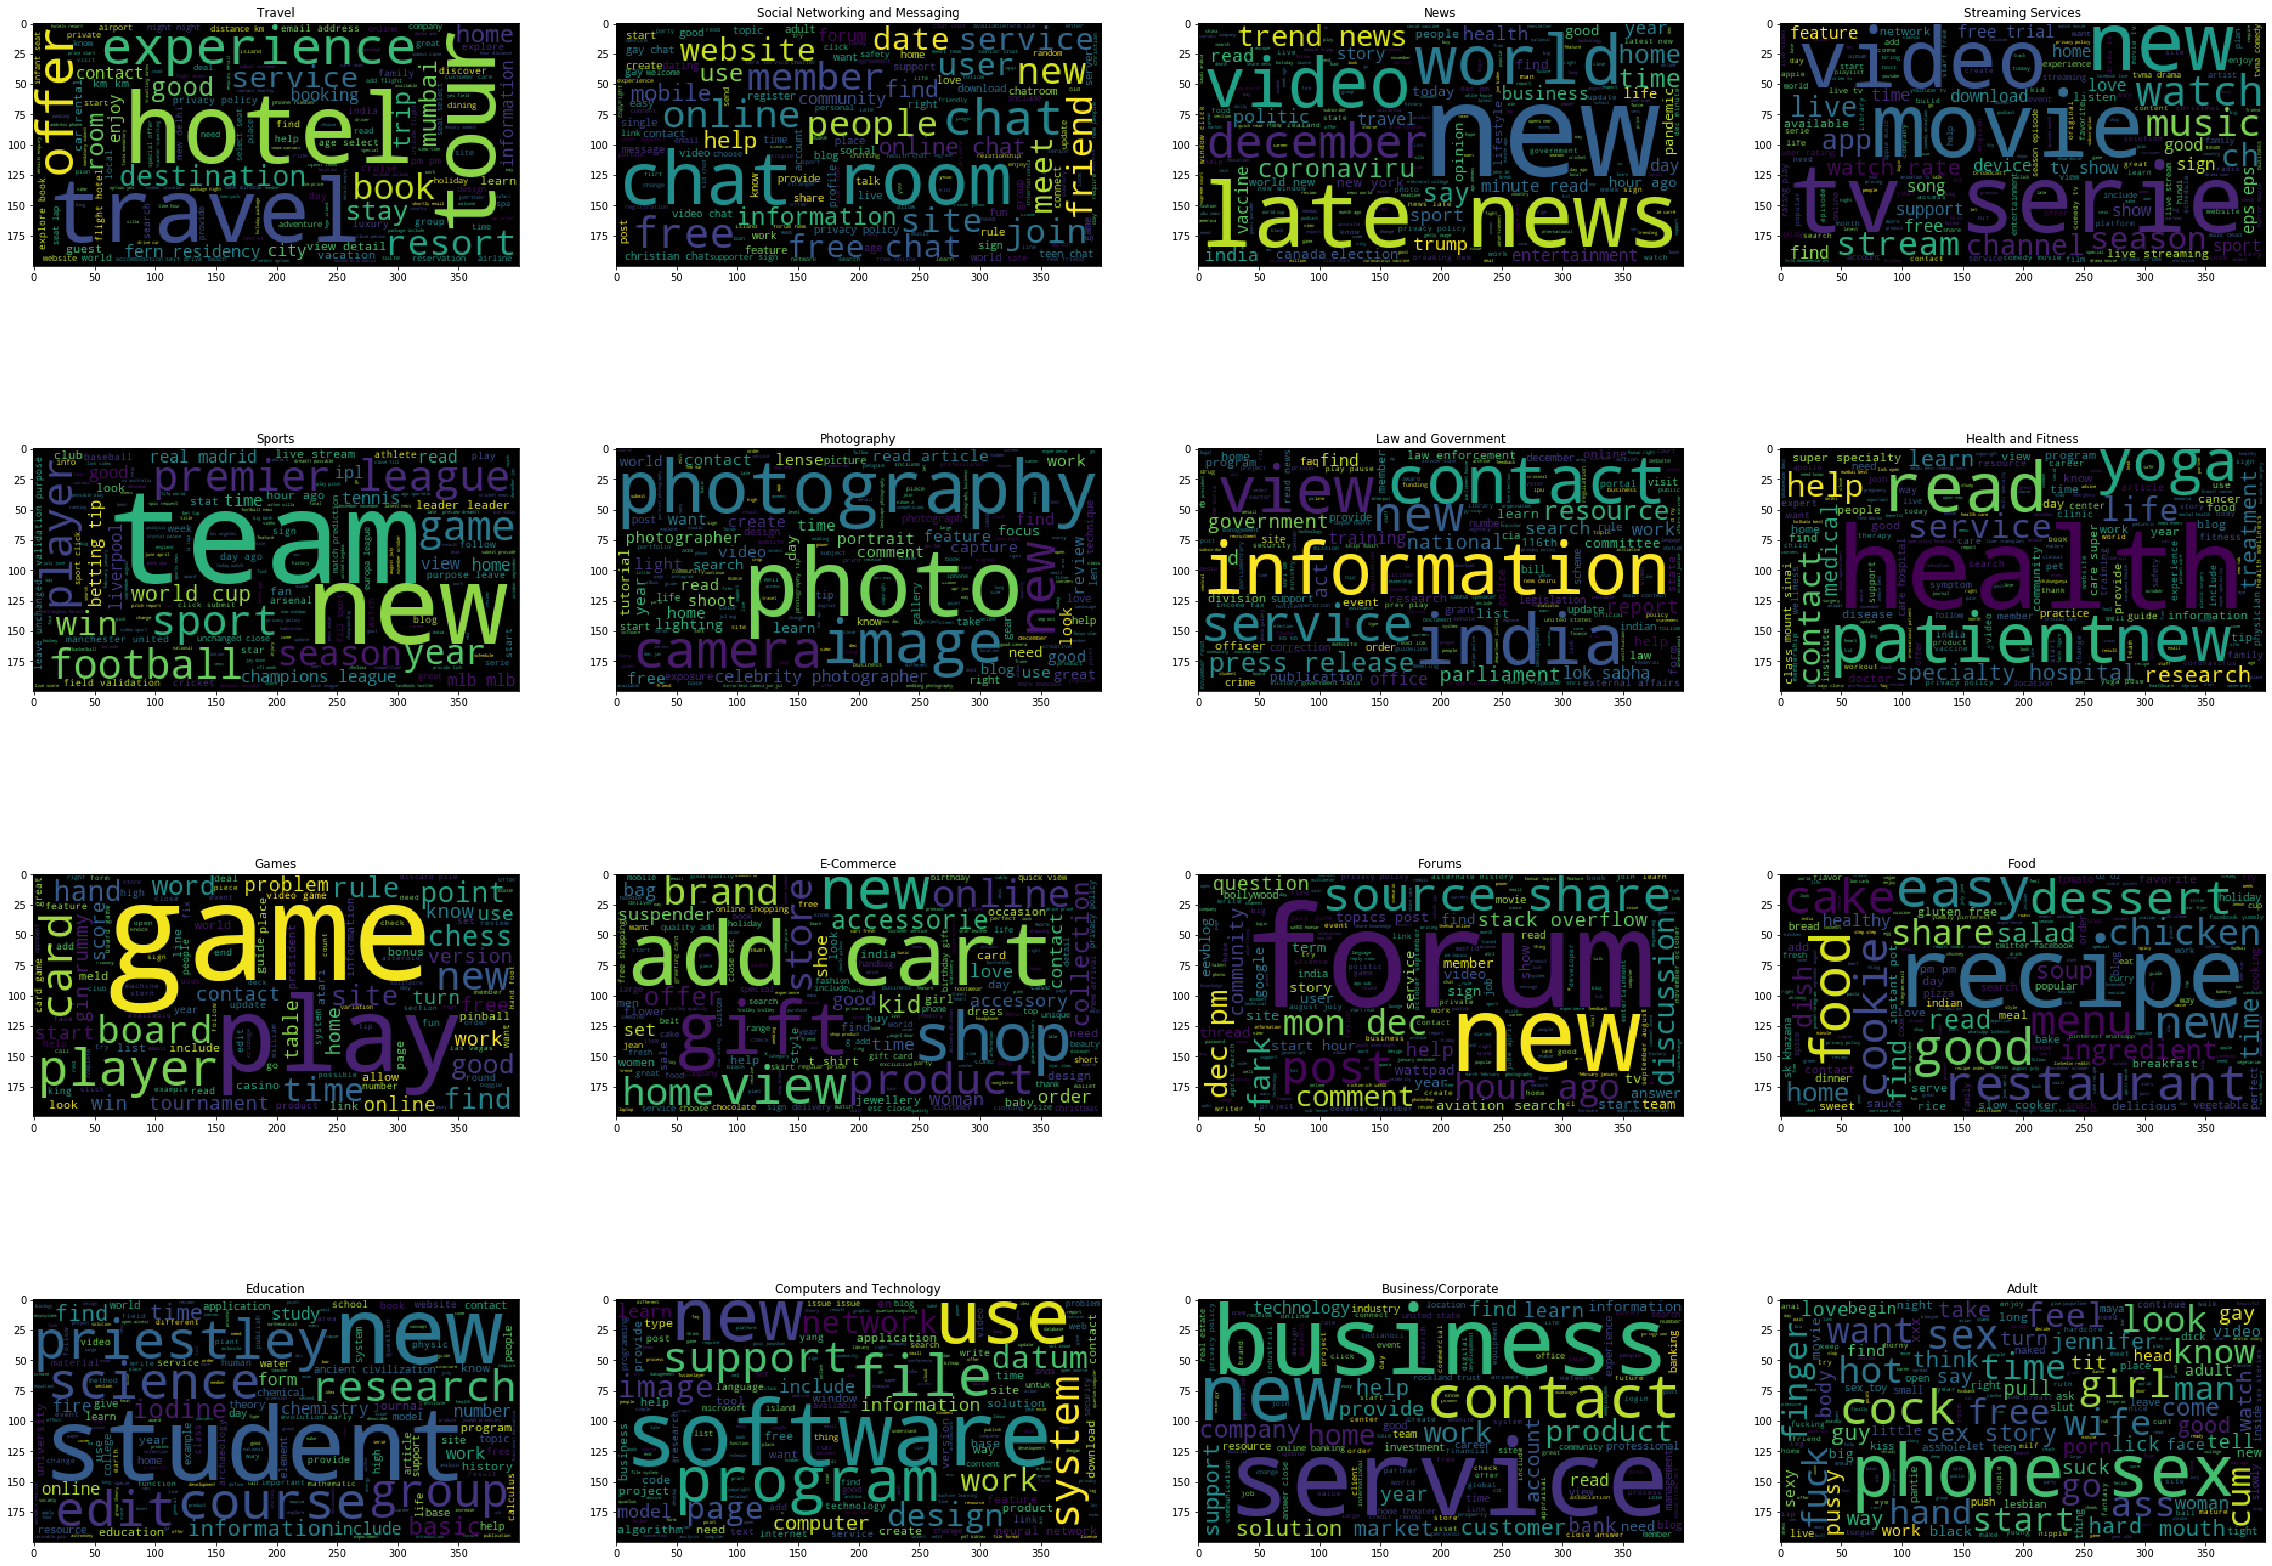

In [15]:
# create cloud of words for each catecories. 
stop_words = set(STOPWORDS)

plt.figure(figsize=(40, 30))

for i, _cat in enumerate(all_categories):
#     print('categories =', _cat)
    _df = df[df.category == _cat]
    text = _df['cleaned_website_text'].values
    

    cloud_words = WordCloud(stopwords=stop_words).generate(' '.join(text))
    plt.subplot(4, 4, i + 1)
    plt.title(_cat)
    plt.imshow(cloud_words)

Preprocessing Text Data:

1. Remove punctuation
2. Remove stop words
3. Lemmatization or Stemming


In [16]:
def clean_punctuation(_text):
    _punctuation = [char for char in _text if char not in string.punctuation]
    _punctuation = ''.join(_punctuation)    
    return _punctuation


def remove_digits(_text):
    _digits = [char for char in _text if char not in string.digits]
    _digits = ''.join(_digits)
    return _digits


def remove_stopwords(_text):
    return ' '.join([word for word in _text.split() if word not in set(STOPWORDS)])


def remove_short_world(_text, len_world=2):
    return ' '.join([word for word in _text.split() if len(word) > len_world])
    

def check_words(_text):
    return ' '.join([word for word in _text.split() if word in dict_word])

    
def stemming(_text):
    _stem = ' '.join([p_stem.stem(w) for w in _text.split()])
    return _stem


def lemmatization(_text):
    _lem = ' '.join([lem.lemmatize(w) for w in _text.split()])
    return _lem

In [17]:
# remove punctuation
res = df['cleaned_website_text'].apply(clean_punctuation)

# remove digits
res = res.apply(remove_digits)

# # remove stopwords
res = res.apply(remove_stopwords)

# # remove words each len less that 2.
res = res.apply(remove_short_world)

# left only words that are in dictionary
res = res.apply(check_words)

res

row_id
0       official site good hotel accommodation big sav...
1       hotel book use vacation work hard year long da...
2       hotel book previously deal predominantly resta...
3       cheap search compare find cheap flight find co...
4       bot create free account create free account si...
                              ...                        
1403    old nude mature granny sex horny old granny se...
1404    chat bondage free video chat site offer cam ch...
1405    cheap adult movie shop great source movie chea...
1406    anal dream house anal dream house anal dream h...
1407    world sex news daily sex news adult news eroti...
Name: cleaned_website_text, Length: 1408, dtype: object

In [18]:
# apply STEMMING or LEMMITIZATION 

res = res.apply(stemming)
# res = res.apply(lemmatization)

**read more about** [```STEMMING``` or ```LEMMITIZATION```](https://medium.com/geekculture/introduction-to-stemming-and-lemmatization-nlp-3b7617d84e65)


### build model

In [40]:
y = df['category']

In [21]:
# transform our words to vectors

In [41]:
vectorizer = CountVectorizer()
tfidf = TfidfTransformer()


In [42]:
X = vectorizer.fit_transform(res)
# print(vectorizer.get_feature_names())

X = TfidfTransformer().fit_transform(X)
print('X_shape =', X.shape)

X_shape = (1408, 15152)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [57]:
# model = RandomForestClassifier(max_depth=11, n_estimators=250)
# model = KNeighborsClassifier(n_neighbors=7)
model = XGBClassifier()

In [58]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

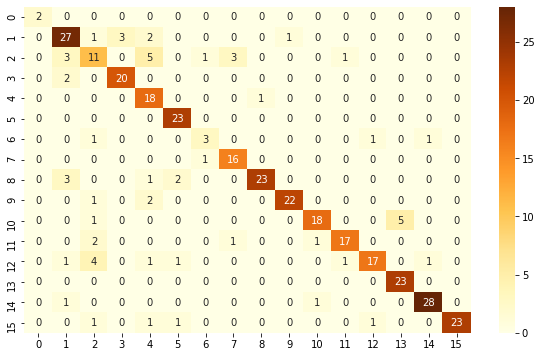

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='YlOrBr', annot=True)

In [60]:
print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

                          Adult       1.00      1.00      1.00         2
             Business/Corporate       0.73      0.79      0.76        34
       Computers and Technology       0.50      0.46      0.48        24
                     E-Commerce       0.87      0.91      0.89        22
                      Education       0.60      0.95      0.73        19
                           Food       0.85      1.00      0.92        23
                         Forums       0.60      0.50      0.55         6
                          Games       0.80      0.94      0.86        17
             Health and Fitness       0.96      0.79      0.87        29
             Law and Government       0.96      0.88      0.92        25
                           News       0.90      0.75      0.82        24
                    Photography       0.89      0.81      0.85        21
Social Networking and Messaging       0.89      0.